In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [32]:
from matplotlib import pyplot as plt
import process
import low_structures
import visualize
import numpy as np
import cv2
plt.rcParams['figure.figsize'] = (10.0, 10.0)

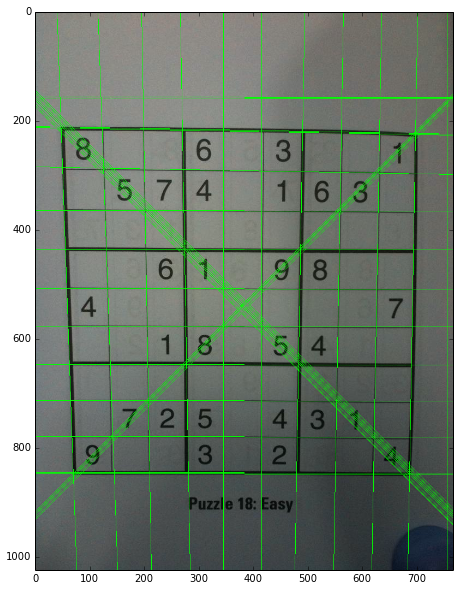

In [35]:
img_org = process.get_example_image('s6.png')
img = process.pre_process(img_org)
lines = process.find_lines(img, 100)
dedup = low_structures.remove_duplicate_lines(lines, 15, img.shape)

points = low_structures.intersections(dedup)
img_w_lines = visualize.draw_lines(img_org, dedup, thickness=1)
img_w_points = visualize.draw_points(img_w_lines, points.values())
_ = plt.imshow(img_w_lines)

In [4]:
buckets = low_structures.generate_angle_buckets(15, step=7.5, ortogonal=True)
bucketed_lines = low_structures.put_lines_into_buckets(buckets, dedup)

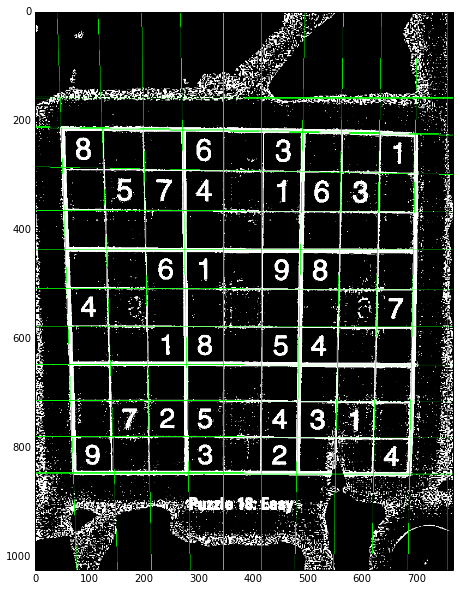

In [33]:
empty = img_org.copy()
empty.fill(0)
angle, line_class = bucketed_lines[0]
tmp = visualize.draw_lines(img, line_class, thickness=1)
_ = plt.imshow(tmp)

[11, 24, 7]


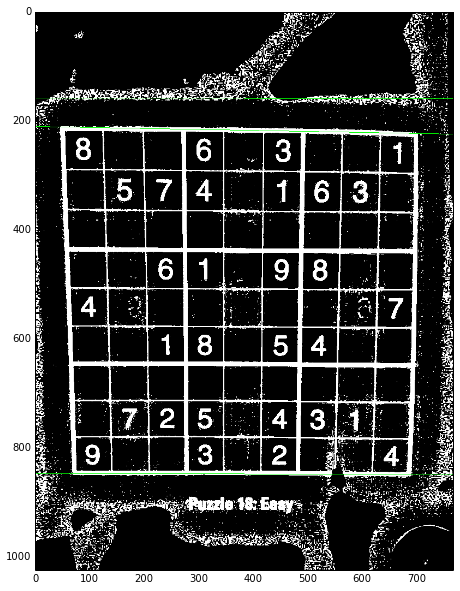

In [44]:
from itertools import chain
# binded = low_structures.bind_intersections_to_lines(line_class)
# low_structures.valid_fragment_lenghts(binded)
close = low_structures.remove_very_close_lines(line_class)
print close
# cv2.namedWindow("x")
# cv2.imshow("x", tmp)
# cv2.waitKey(0)
# close_lines_id = [x for x in chain(*close)]
close_lines = [line for i, line in enumerate(line_class) if i in close]
tmp = visualize.draw_lines(img, close_lines, thickness=1)
_ = plt.imshow(tmp)